In [10]:
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
human_genome = SeqIO.read("/kaggle/input/human-chromosome-21/Homo_sapiens.GRCh38.dna.chromosome.20.fa", "fasta")


Here we're importing the curated data of the chromosome 20 which can be used to build the machine learning model. I have taken this data as my disorder of study is located on the chromosome 20. Likewise the data can be selected accordingly

In [11]:
sequence_count = len(human_genome)
print("Total count of the sequence: ", sequence_count)

Total count of the sequence:  64384167


In [12]:
human_genome_DNA=human_genome.seq

In [13]:
count_A = human_genome_DNA.count('A')
count_G = human_genome_DNA.count('G')
count_C = human_genome_DNA.count('C')
count_T = human_genome_DNA.count('T')

# Calculate the percentages
total_count = len(human_genome_DNA)
percentage_A = (count_A / total_count) * 100
percentage_G = (count_G / total_count) * 100
percentage_C = (count_C / total_count) * 100
percentage_T = (count_T / total_count) * 100

# Print the percentages
print("Percentage of A: {:.2f}%".format(percentage_A))
print("Percentage of G: {:.2f}%".format(percentage_G))
print("Percentage of C: {:.2f}%".format(percentage_C))
print("Percentage of T: {:.2f}%".format(percentage_T))

Percentage of A: 27.75%
Percentage of G: 21.89%
Percentage of C: 21.61%
Percentage of T: 28.06%


In [14]:
nucleotides={'A':count_A,'G':count_G,'C':count_C,'T':count_T}
print(nucleotides)

{'A': 17867246, 'G': 14094472, 'C': 13916133, 'T': 18066406}


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


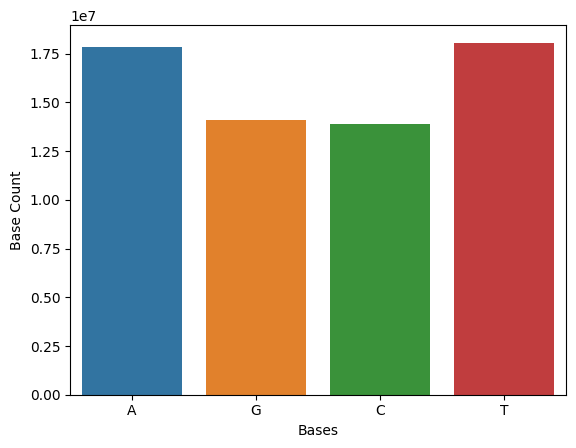

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the nucleotide counts
nucleotides = {'A': count_A, 'G': count_G, 'C': count_C, 'T': count_T}

# Create lists for x-axis labels and y-axis values
bases = list(nucleotides.keys())
base_counts = list(nucleotides.values())

# Create bar plot using Seaborn
sns.barplot(x=bases, y=base_counts)

# Set labels for x-axis and y-axis
plt.xlabel('Bases')
plt.ylabel('Base Count')

# Display the plot
plt.show()

In [16]:
from Bio.SeqUtils import GC
print("GC% is equal to: " +str(GC(human_genome_DNA)))

/opt/conda/lib/python3.10/site-packages/Bio/SeqUtils/__init__.py:144: BiopythonDeprecationWarning: GC is deprecated; please use gc_fraction instead.
  warnings.warn(


GC% is equal to: 43.50542424506323


In [17]:
human_genome_mRNA=human_genome_DNA.transcribe()
print("DNA: " +human_genome_DNA[:100])
print("RNA: " +human_genome_mRNA[:100])

DNA: TGTTCAGTCGGGCAGGGAGTGGGAATAGACAAGACCACAAGCAGCTTGGTGCCTCTGAAAGGGAGAGGGGTGGAGGGGAGACTAGAGAGGTGGGTAGGAA
RNA: UGUUCAGUCGGGCAGGGAGUGGGAAUAGACAAGACCACAAGCAGCUUGGUGCCUCUGAAAGGGAGAGGGGUGGAGGGGAGACUAGAGAGGUGGGUAGGAA


In [18]:
human_genome_pro=human_genome_DNA.translate()
print("DNA: " +human_genome_DNA[:100])
print("Protein " +human_genome_pro[:100])

DNA: TGTTCAGTCGGGCAGGGAGTGGGAATAGACAAGACCACAAGCAGCTTGGTGCCTCTGAAAGGGAGAGGGGTGGAGGGGAGACTAGAGAGGTGGGTAGGAA
Protein CSVGQGVGIDKTTSSLVPLKGRGVEGRLERWVGILDSTDHVLDVMLSPPALCQVRHLVFYIYYITFYYRQLHSNPFLSIPFLSTPSHSIPLPSFPFQSIP


In [22]:
print(f"human_genome's genome has {len(human_genome_pro)} amino acids")

human_genome's genome has 21461389 amino acids


In [19]:
func_proteins = human_genome_pro.split('*')#since * is the end codon
print(f"We have {len(func_proteins)} functional proteins in the human_genome genome")

We have 1030488 functional proteins in the human_genome genome


In [20]:
func_proteins = [i for i in func_proteins if len(i) >= 20]

In [21]:
print(f"We have {len(func_proteins)} functional proteins in the human_genome ")

We have 362026 functional proteins in the human_genome 


In [22]:
func_proteins

[Seq('CSVGQGVGIDKTTSSLVPLKGRGVEGRLERWVGILDSTDHVLDVMLSPPALCQV...PLR'),
 Seq('IPFYCIPFGSTPFHSTPVHSIPLHSTSFHSIPLNSTPFH'),
 Seq('IPLHFTPLNSALLHSTPLFFIPFHSTPFHSTPLHSTPLHSITLHYTPFH'),
 Seq('TPFHSTPLHFNPLHSTPCHSTPFHSIPCHSIPFRSTPFQSTTRHSIPLDSIPLH...HYI'),
 Seq('FHSIPLHSTPLHSTTLFSSPLLSNALHSTPIHTIPFQSTPLYCSPFHSTPFHST...SFH'),
 Seq('LHPTALHSIPLHSTTLHSIPLHSTPFHFTPFHSTPLLSSLLHSIPXXXXXXXXX...HSI'),
 Seq('LHYIPLHCTPYHSTPLYSIPLQPIPLHSSLFHATPLHSTQFHSTPLHSIPLHST...TPF'),
 Seq('TTPFHSTTFESIPFHSNPFH'),
 Seq('TPFHSIPHHSIPLHSTSLLSTPFHSIPLHSTPLLSIPFHSILFHSTPLLSTPLY...PFH'),
 Seq('IPFHSIPLHFTPFNSTAFHCTPFNSIQFHSIXXXXXXXXXXXXXXXXXXXXXXX...PQW'),
 Seq('NVMQLWSMILSIIFLVGHLVRTLKERKKVVKRHYPLAFAFLLSSA'),
 Seq('SMVKMLESMQPSCKHSAKAQSRNVF'),
 Seq('YHCEAIIAFLDFMLYKNNKPLIYKRQHFSCFMFQPIVLVNRLCIIDQM'),
 Seq('LCNKPVHVPLNLKKEIWSFLKVIKVLFSFFVFIFFSVFS'),
 Seq('KEYHFNFENKLKPKIRYLESILCIFLEVTDLTFYFLVC'),
 Seq('YSILGCKRYFGGSYSIYFSLPVFSYILKLNEVYFCQNKINKRNFIINDKLEETGKIR'),
 Seq('FFIPCIIDLIREDYNSHPLSVSAL'),
 Seq('WTVHALKSYLSLEYSRNDNE

In [23]:
# Assuming your original dataset is stored in the 'func_proteins' list

total_rows = len(func_proteins)
chunk_size = total_rows // 4  # Integer division

chunks = []
start_index = 0

# Split the list into chunks
for i in range(4):
    end_index = start_index + chunk_size
    
    # For the last chunk, include any remaining elements
    if i == 3:
        end_index = total_rows
    
    chunk = func_proteins[start_index:end_index]
    chunks.append(chunk)
    
    start_index = end_index

# Access each chunk using chunks[0], chunks[1], chunks[2], chunks[3]


In [24]:
chunks[0]

[Seq('CSVGQGVGIDKTTSSLVPLKGRGVEGRLERWVGILDSTDHVLDVMLSPPALCQV...PLR'),
 Seq('IPFYCIPFGSTPFHSTPVHSIPLHSTSFHSIPLNSTPFH'),
 Seq('IPLHFTPLNSALLHSTPLFFIPFHSTPFHSTPLHSTPLHSITLHYTPFH'),
 Seq('TPFHSTPLHFNPLHSTPCHSTPFHSIPCHSIPFRSTPFQSTTRHSIPLDSIPLH...HYI'),
 Seq('FHSIPLHSTPLHSTTLFSSPLLSNALHSTPIHTIPFQSTPLYCSPFHSTPFHST...SFH'),
 Seq('LHPTALHSIPLHSTTLHSIPLHSTPFHFTPFHSTPLLSSLLHSIPXXXXXXXXX...HSI'),
 Seq('LHYIPLHCTPYHSTPLYSIPLQPIPLHSSLFHATPLHSTQFHSTPLHSIPLHST...TPF'),
 Seq('TTPFHSTTFESIPFHSNPFH'),
 Seq('TPFHSIPHHSIPLHSTSLLSTPFHSIPLHSTPLLSIPFHSILFHSTPLLSTPLY...PFH'),
 Seq('IPFHSIPLHFTPFNSTAFHCTPFNSIQFHSIXXXXXXXXXXXXXXXXXXXXXXX...PQW'),
 Seq('NVMQLWSMILSIIFLVGHLVRTLKERKKVVKRHYPLAFAFLLSSA'),
 Seq('SMVKMLESMQPSCKHSAKAQSRNVF'),
 Seq('YHCEAIIAFLDFMLYKNNKPLIYKRQHFSCFMFQPIVLVNRLCIIDQM'),
 Seq('LCNKPVHVPLNLKKEIWSFLKVIKVLFSFFVFIFFSVFS'),
 Seq('KEYHFNFENKLKPKIRYLESILCIFLEVTDLTFYFLVC'),
 Seq('YSILGCKRYFGGSYSIYFSLPVFSYILKLNEVYFCQNKINKRNFIINDKLEETGKIR'),
 Seq('FFIPCIIDLIREDYNSHPLSVSAL'),
 Seq('WTVHALKSYLSLEYSRNDNE

In [25]:
import pandas as pd
from Bio.Seq import Seq

# Given list of sequences
sequences = chunks[:100]  # the first 100 sequences

# Create a DataFrame
df = pd.DataFrame(columns=['sequence no', 'amino acid sequence', 'sequence length'])

# Iterate over the extracted sequences and add them to the DataFrame
for i, sequence in enumerate(sequences):
    df.loc[i] = [i+1, str(sequence), len(sequence)]

df


,sequence no,amino acid sequence,sequence length
0,1,[Seq('CSVGQGVGIDKTTSSLVPLKGRGVEGRLERWVGILDSTDH...,90506
1,2,[Seq('SFTMPPTNRYFFQALNKCQHCARCLMHKITAHSPRFKLGC...,90506
2,3,"[Seq('GGRGQGRRGAGSRQPAPPPPSRPSPFSERPTPR'), Seq...",90506
3,4,[Seq('ATAPGLYFLLSSSYSWACSPFLHPQAHDSSLCPVIQLL')...,90508


In [26]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Prepare the data
X = df['amino acid sequence']

# Vectorize the sequences using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_encoded = vectorizer.fit_transform(X)

# Perform K-means clustering
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_encoded)
cluster_labels = kmeans.labels_
df['Cluster'] = cluster_labels

# Print the counts of samples in each cluster
print(df['Cluster'].value_counts())


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2    1
1    1
0    1
3    1
Name: Cluster, dtype: int64


This dataset can be used for future machine learning predictions like classification and function prediction of proteins.
We next perform unsupervised machine learning for protein classification using K-means clustering. We start by preparing the data and vectorizing the amino acid sequences. Then, K-means clustering is applied to group the sequences into clusters. The cluster labels are added to the dataset, and the count of sequences in each cluster is displayed. The goal is to classify proteins based on their similarities, without predefined protein classes.Performing Unsupervised K Means clustering on the final dataset we get

similarly we can prepare a dataset of the sample data sequence of the pateint and then use it for prediction with respect to this prepared dataset.